**Libraries Import**

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Sample Data Set
# X (පළපුරුද්ද - අවුරුදු)
#x- dependent value
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# y (වැටුප - රු. ලක්ෂ)
# y = independent value
y = np.array([3.5, 4.9, 6.8, 8.1, 10.0, 11.8, 13.2, 15.1, 16.9, 18.5])

In [3]:
#Data Reshaping
# X එක 1D array (10,) සිට 2D array (10, 1) බවට පත් කිරීම
X_reshaped = X.reshape(-1, 1)

# print(X_reshaped.shape) # (10, 1)

Model Create and Train

In [4]:
# 1. Linear Regression object එකක් හදනවා
model = LinearRegression()

# 2. Model එක train කරනවා (fit කරනවා)
model.fit(X_reshaped, y)

print("Model trained successfully.")

Model trained successfully.


In [6]:
# 4. ප්‍රතිඵල බැලීම (Slope - m සහ Intercept - c)
m = model.coef_[0]
c = model.intercept_

print(f"(Slope - m): {m:.2f}")
print(f"Intercept (c): {c:.2f}")
print(f"Model formula: y = {m:.2f}x + {c:.2f}")

(Slope - m): 1.68
Intercept (c): 1.63
Model formula: y = 1.68x + 1.63


In [9]:
#test the model with a new value
new_experience = 7.5
predicted_salary = model.predict(np.array([[new_experience]]))

print(f"(Prediction): {predicted_salary[0]:.2f} Lkr")

(Prediction): 14.24 Lkr


#result visualization 

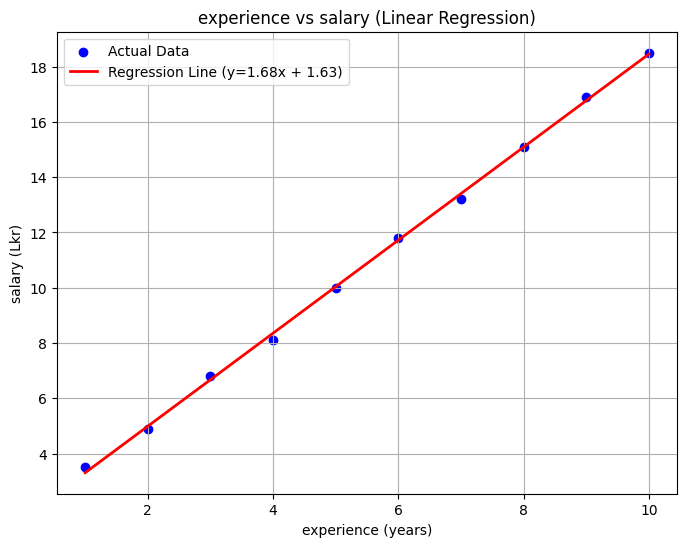

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
y_predicted = model.predict(X_reshaped)
plt.plot(X, y_predicted, color='red', linewidth=2, label=f'Regression Line (y={m:.2f}x + {c:.2f})')

plt.title('experience vs salary (Linear Regression)')
plt.xlabel('experience (years)')
plt.ylabel('salary (Lkr)')
plt.legend()
plt.grid(True)
plt.show()

---

**data Train/Test Split**

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [15]:
# 100 දෙනෙක්ගේ 'පළපුරුද්ද' (Experience) සහ 'වැටුප' (Salary) simulate කරමු
np.random.seed(42)  # ප්‍රතිඵල එකම විදියට තියාගන්න

# X = අවුරුදු 0 සිට 20 දක්වා අහඹු පළපුරුද්ද (data points 100)
X = np.random.rand(100, 1) * 20

# y = සැබෑ සම්බන්ධය (y = 5*X + 30) + 'noise' (අහඹු වෙනස්කම්)
y = (5 * X) + 30 + np.random.randn(100, 1) * 5

# X (100, 1) සහ y (100, 1) ලෙස 2D array විදියටම තියෙනවා.
# y 1D කරන්න ඕන නම්: y = y.ravel()
y = y.ravel() # y (100,) හැඩයට ගේනවා

In [16]:
# test_size=0.2 කියන්නේ 20%ක් test එකට ගන්න කියන එක
# random_state=42 කියන්නේ කේතය නැවත run කළත් එකම විදියට බෙදෙන්නයි
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"මුළු දත්ත ගණන: {len(X)}")
print(f"Train දත්ත ගණන: {len(X_train)}") # 80% = 80
print(f"Test දත්ත ගණන: {len(X_test)}")   # 20% = 20

මුළු දත්ත ගණන: 100
Train දත්ත ගණන: 80
Test දත්ත ගණන: 20


In [17]:
model = LinearRegression()

# Train the model using ONLY the training data
model.fit(X_train, y_train)

print("Model එක train කිරීම අවසන්!")
print(f"සොයාගත් සමීකරණය: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

Model එක train කිරීම අවසන්!
සොයාගත් සමීකරණය: y = 4.90x + 30.71


In [19]:
#Model Evaluate
y_pred = model.predict(X_test)

y_pred

array([ 36.94285505, 118.40159484, 106.38933097,  95.63726954,
        56.07325456,  73.84653405,  59.34276626, 115.2928648 ,
        32.73170782,  67.41696507,  73.042257  ,  90.249853  ,
       110.62427127, 123.69893153,  42.43399383,  46.00333814,
       106.29384414,  37.97044167, 112.28831523,  47.42477739])

performance analytic metrics

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}") #closer to 0 is better
print(f"R-squared ($R^2$) Score: {r2:.2f}") #if it is close to 1, model is good

Mean Squared Error (MSE): 16.34
R-squared ($R^2$) Score: 0.98
